# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os


In [9]:
dia = pd.read_csv('dia_clean.csv')


In [10]:
os.chdir(r'/Users/sg/Documents/GitHub/806_Repo/Labs/module_2/M2-mini-project1')

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [11]:
dia.describe()

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,26969.129854,0.797862,3.405785,3.051122,61.749388,57.457083,3932.017022,5.731974,5.733785,3.539610
std,15571.459471,0.473965,1.701172,1.647111,1.432488,2.234080,3988.641503,1.119642,1.111494,0.691261
min,0.000000,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,2.240000
25%,13484.250000,0.400000,2.000000,2.000000,61.000000,56.000000,949.250000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40453.750000,1.040000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53939.000000,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.970000


In [13]:

diam = dia.drop('Unnamed: 0', axis=1)

In [14]:
diam.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797862,3.405785,3.051122,61.749388,57.457083,3932.017022,5.731974,5.733785,3.539610
std,0.473965,1.701172,1.647111,1.432488,2.234080,3988.641503,1.119642,1.111494,0.691261
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,2.240000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,949.250000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.970000


Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [5]:
#To protect assets, brilliants starting from the size of a half-carat (0.50 ct) are suited. 
#The whiter the diamond, the higher its price.
#Internally flawless diamonds are of course the ones most sought after. Below that, other clarity criterions are graded according to the size of the inclusions.
#Today, the quality of a diamond's cut is as important as its color and clarity. 
#Every diamond absolutely needs to have an independet certificate.


## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [16]:
diam.groupby("color").mean()

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0.0,1.162137,2.776353,61.887215,57.812393,5323.818020,6.519338,6.518105,4.032696
1.0,1.026927,2.964035,61.846385,57.577278,5091.874954,6.222826,6.222730,3.846828
2.0,0.911496,2.934104,61.836911,57.518239,4484.028189,5.984522,5.979882,3.698517
3.0,0.771088,3.463419,61.757449,57.288060,3998.145173,5.678549,5.681198,3.507542
4.0,0.736509,3.134605,61.694087,57.433148,3725.091938,5.616727,5.620529,3.466252
5.0,0.657882,2.969784,61.662076,57.491456,3076.854737,5.411607,5.416336,3.337809
6.0,0.657715,2.691025,61.698066,57.404355,3168.106436,5.417851,5.421928,3.343161


**What do you see? Pay special attention to the relationship between price and color.**

There's probably a correlation between price and color.  More the coefficient color is strong, more the price is low.

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

Text(0.5, 1.0, 'Distribution of the diamonds by color')

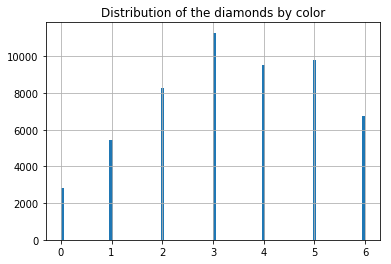

In [22]:
diam.color.hist(bins=100).set_title("Distribution of the diamonds by color")

Color 3 is the mode of the distribution.
Color 0 regroups less diamonds.

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [20]:
diam.groupby("carat").mean()

,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,
0.20,5.166667,2.833333,61.100000,59.333333,365.166667,3.786667,3.753333,2.303333
0.21,5.444444,2.666667,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222
0.22,4.800000,2.600000,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000
0.23,4.518771,4.901024,61.426621,58.034130,486.143345,3.946382,3.973379,2.431706
0.24,4.185039,4.972441,61.599213,57.488189,505.185039,3.990157,4.019331,2.466339
0.25,4.146226,4.853774,61.565566,57.363208,550.924528,4.062500,4.086934,2.507642
0.26,3.928854,4.723320,61.677470,56.911858,550.897233,4.102688,4.124704,2.536798
0.27,4.047210,4.729614,61.599142,56.778970,574.759657,4.159142,4.181588,2.568369
0.28,3.898990,4.727273,61.526263,56.863636,580.121212,4.207172,4.233687,2.596111


Text(0.5, 1.0, 'Distribution of the diamonds by carat')

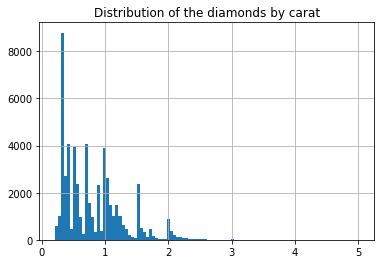

In [23]:
diam.carat.hist(bins=100).set_title("Distribution of the diamonds by carat")

The distribution is quite irregular. There are many diamonds less than 0.5.

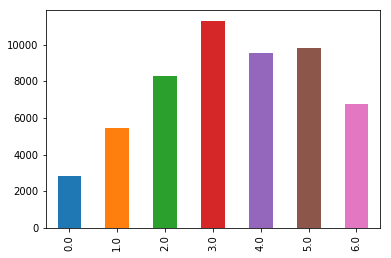

In [32]:
diam.color.value_counts().sort_index().plot(kind='bar')


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

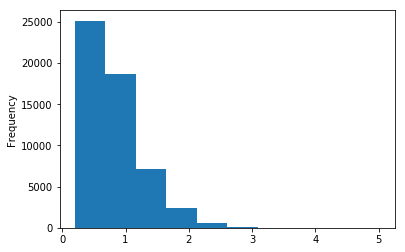

In [25]:
diam.carat.plot.hist()

The distribution is right skewed. Most diamonds are under 1 carat.
The small and light diamonds are common in our dataset.

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [26]:
diam.groupby("table").mean()

,carat,color,clarity,depth,price,x,y,z
table,,,,,,,,
43.0,1.040000,1.000000,4.000000,62.900000,4997.000000,6.450000,6.410000,4.040000
44.0,0.290000,5.000000,4.000000,62.800000,474.000000,4.200000,4.240000,2.650000
49.0,0.650000,3.000000,3.000000,64.250000,2290.500000,5.355000,5.320000,3.425000
50.0,1.510000,3.000000,2.000000,61.500000,8995.500000,7.380000,7.295000,4.510000
50.1,0.940000,2.000000,1.000000,66.000000,3353.000000,6.130000,6.170000,4.060000
51.0,0.883333,3.222222,2.666667,63.300000,4063.666667,5.995556,5.941111,3.778889
51.6,2.000000,0.000000,4.000000,61.000000,13203.000000,8.140000,8.180000,4.980000
52.0,0.871071,3.517857,2.892857,62.833929,4342.000000,5.877143,5.870179,3.696964
52.4,0.500000,4.000000,4.000000,62.500000,1679.000000,5.070000,5.110000,3.180000


**Finally, do the same with the `clarity` column.**

In [28]:
diam.groupby("clarity").mean()

,carat,color,depth,table,price,x,y,z
clarity,,,,,,,,
0.0,1.283846,2.968961,62.734278,58.303779,3924.168691,6.761093,6.709379,4.223711
1.0,1.077501,3.470127,61.771879,57.926923,5061.489498,6.403973,6.394177,3.951607
2.0,0.850482,3.448450,61.853042,57.662541,3996.001148,5.888383,5.888256,3.640922
3.0,0.763850,3.494370,61.724249,57.418040,3924.166204,5.658633,5.659782,3.492600
4.0,0.727134,3.161586,61.667952,57.314249,3839.360264,5.572912,5.579302,3.438104
5.0,0.596202,3.569483,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221737
6.0,0.503131,3.350848,61.624521,56.883881,2519.512315,4.961721,4.976437,3.061825
7.0,0.505123,3.101676,61.510615,56.507207,2864.839106,4.968402,4.989827,3.062034


Most the clarity number is high, most the price is high.

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [23]:
The carat feature affects the most the price.

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


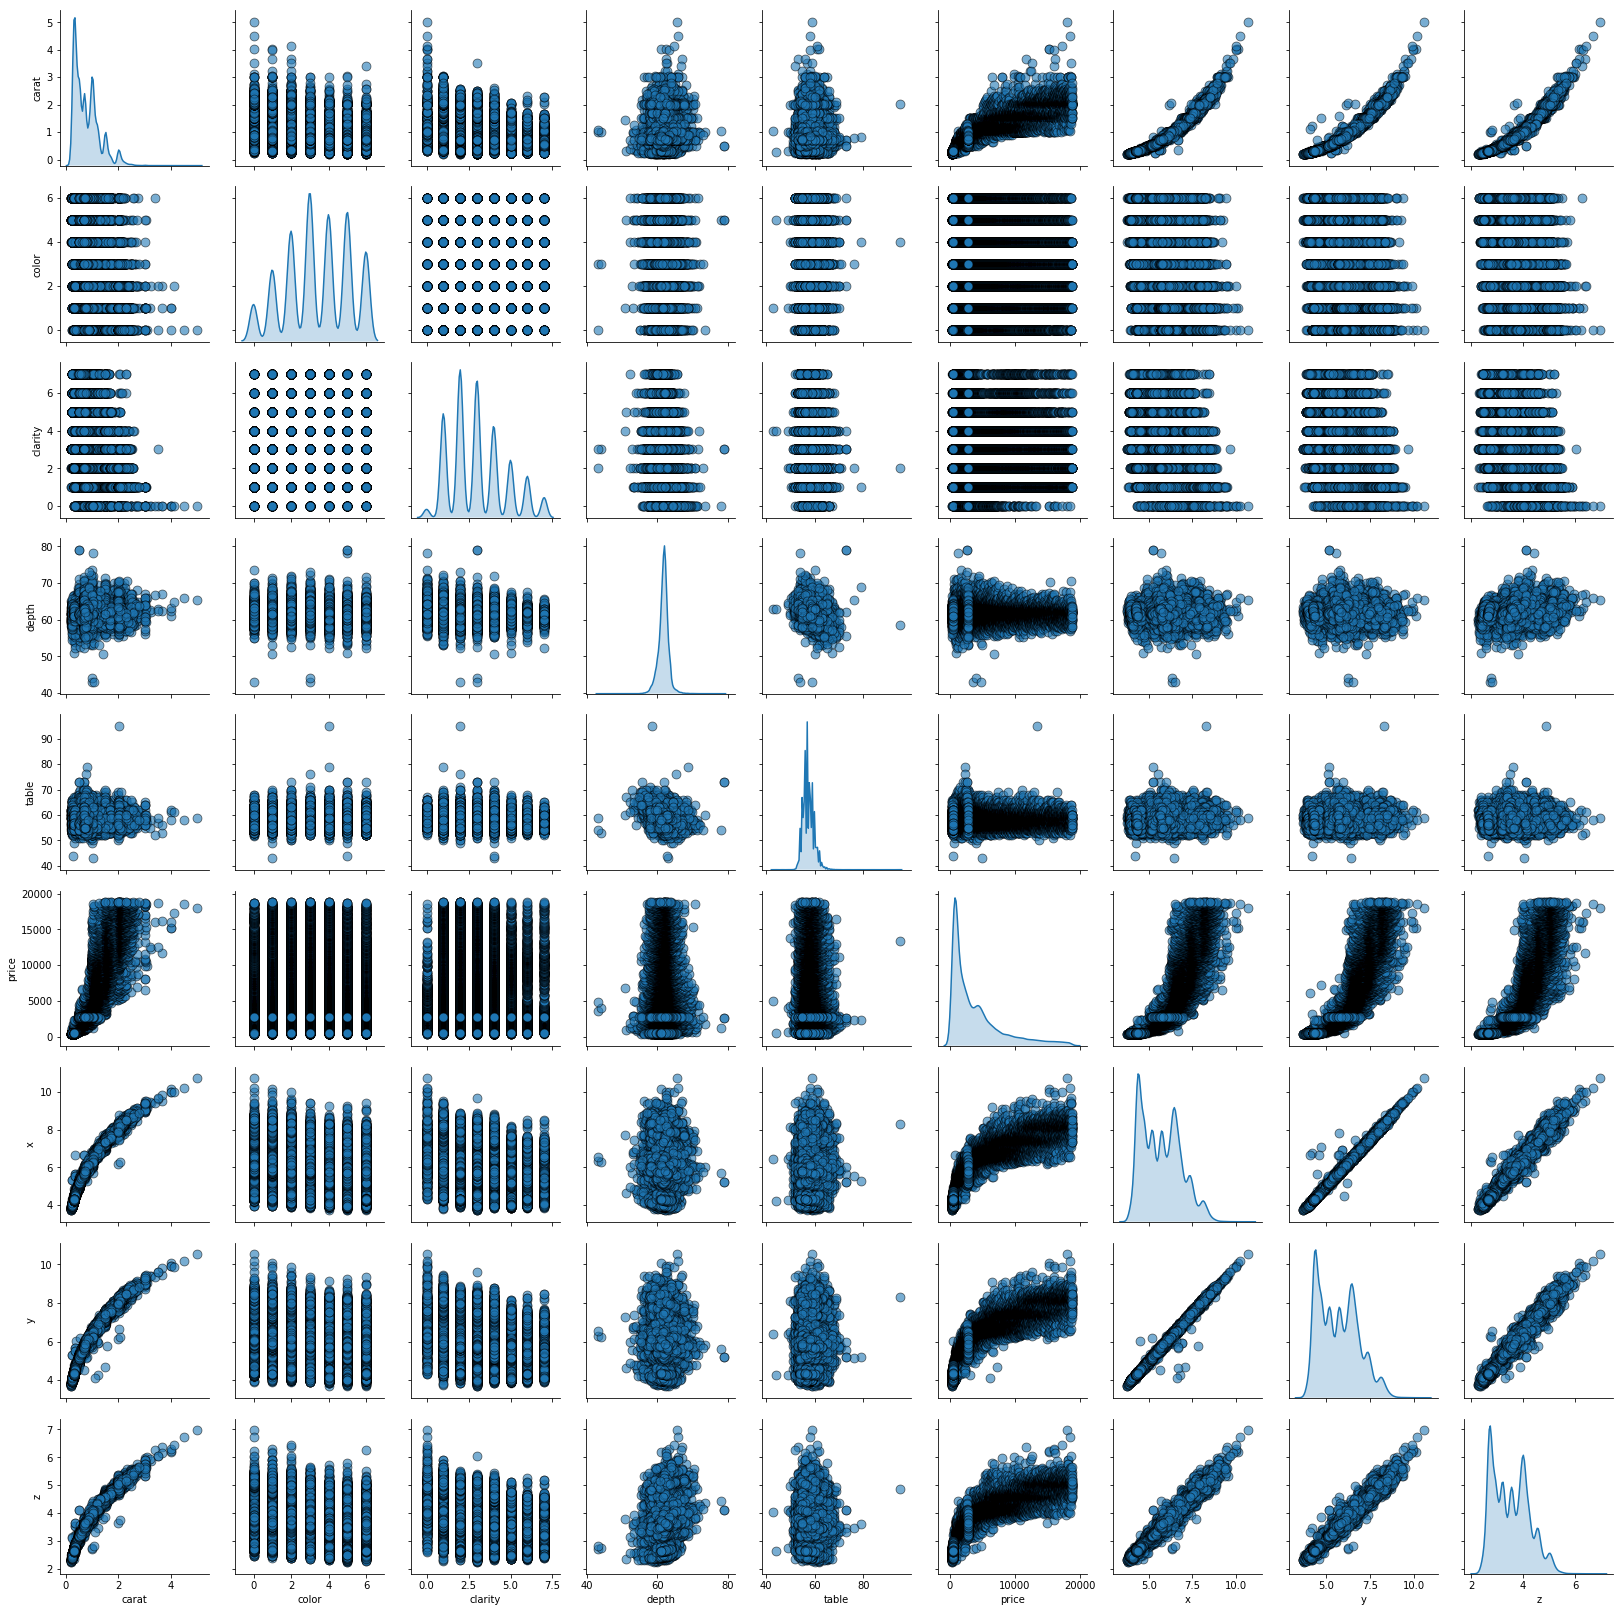

In [31]:
import seaborn as sns
sns.pairplot(diam, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

There's a relation between color and clarity.
Carat and clarity are skewed on the right.

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

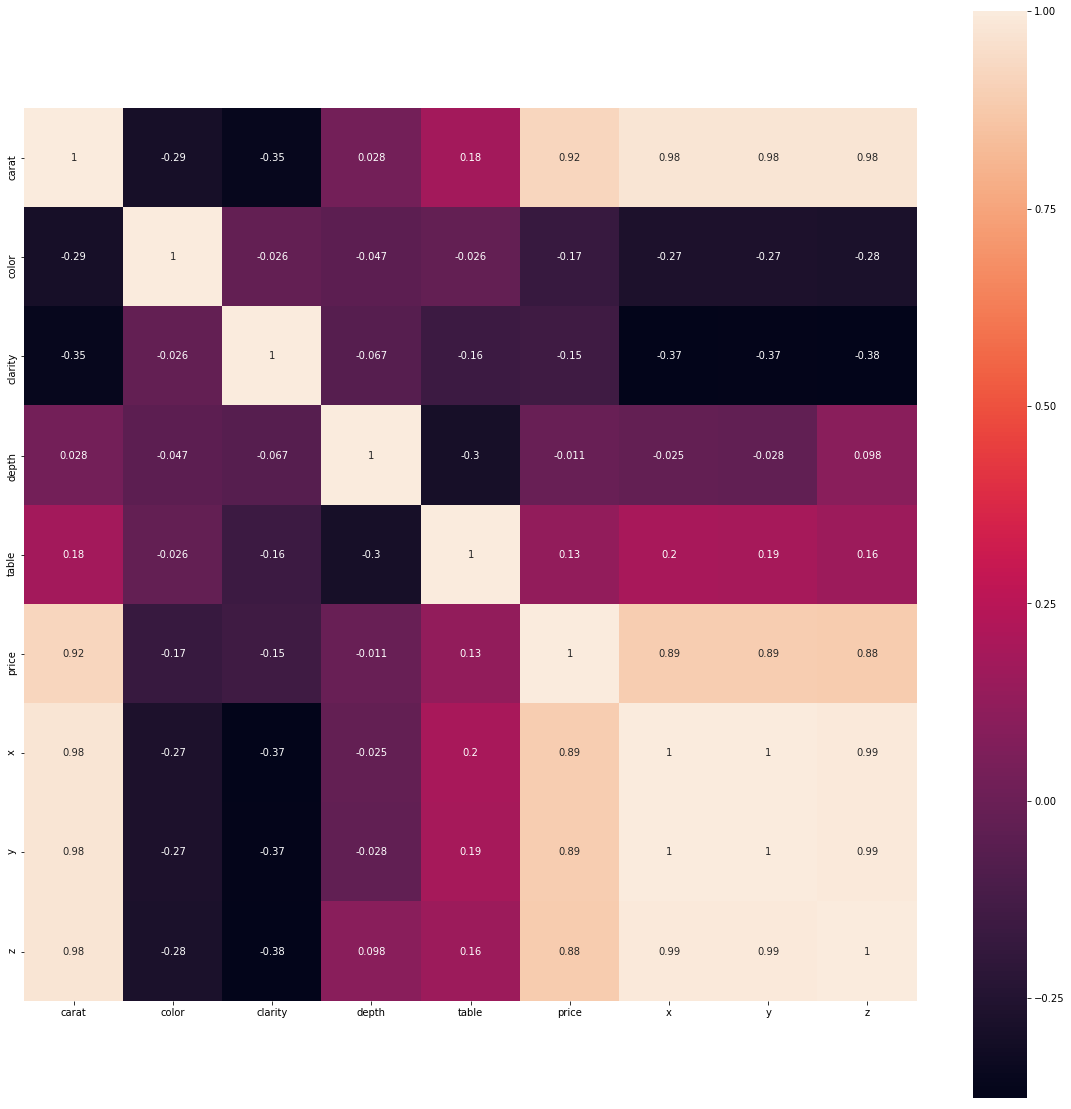

In [43]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(diam.corr(), annot=True, square=True)
plt.savefig("heatmap.png")
plt.show()

In [42]:
plt.savefig("heatmap.png")

<Figure size 432x288 with 0 Axes>

![heatmap.png](/Users/sg/Documents/GitHub/806_Repo/Labs/module_2/M2-mini-project1)

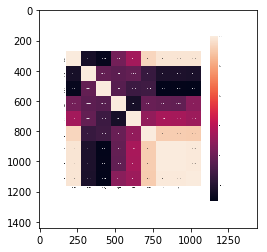

In [46]:
import matplotlib.image as mpimg
image = mpimg.imread("heatmap.png")
plt.imshow(image)
plt.show()

In [ ]:
https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o

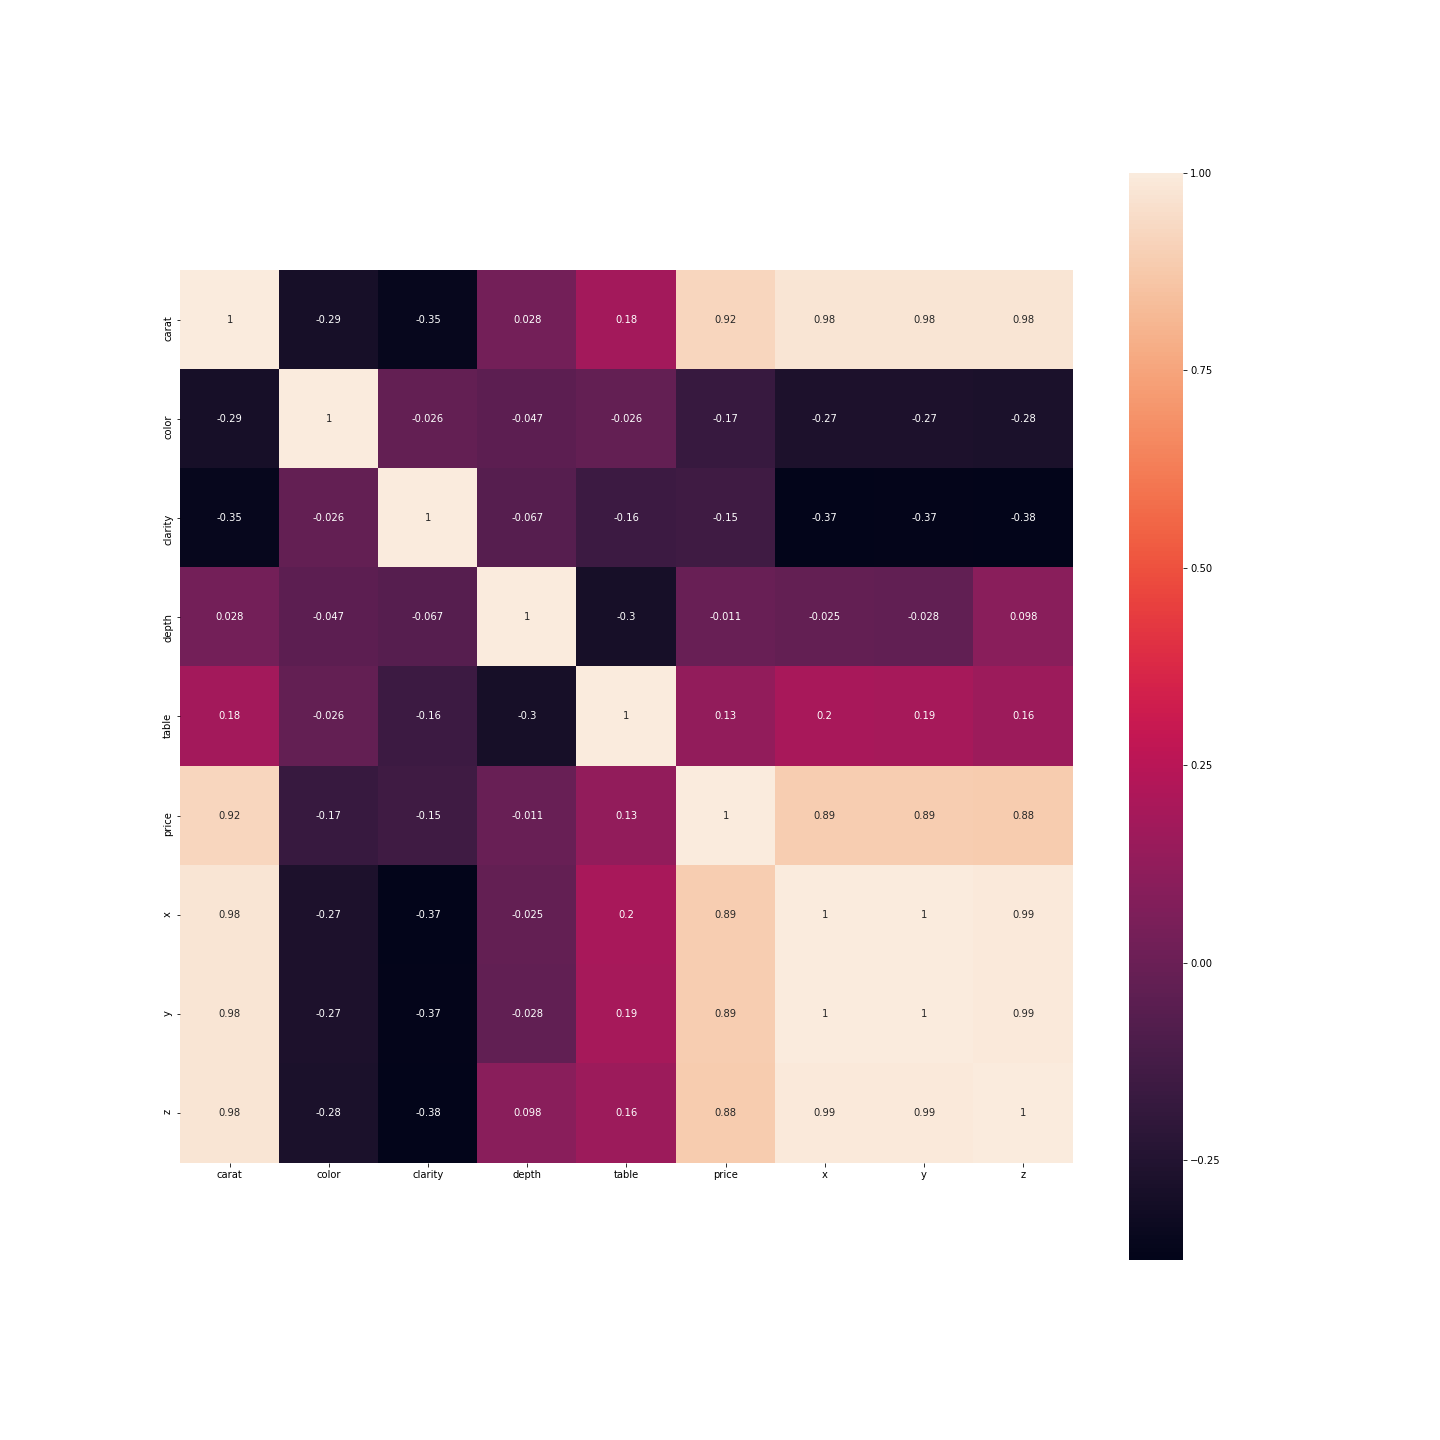

**What do you see here? Regarding the results before, does it fit with them?**

The correlation between carat and price is 0.92. The variable price and carat are correlated. 

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


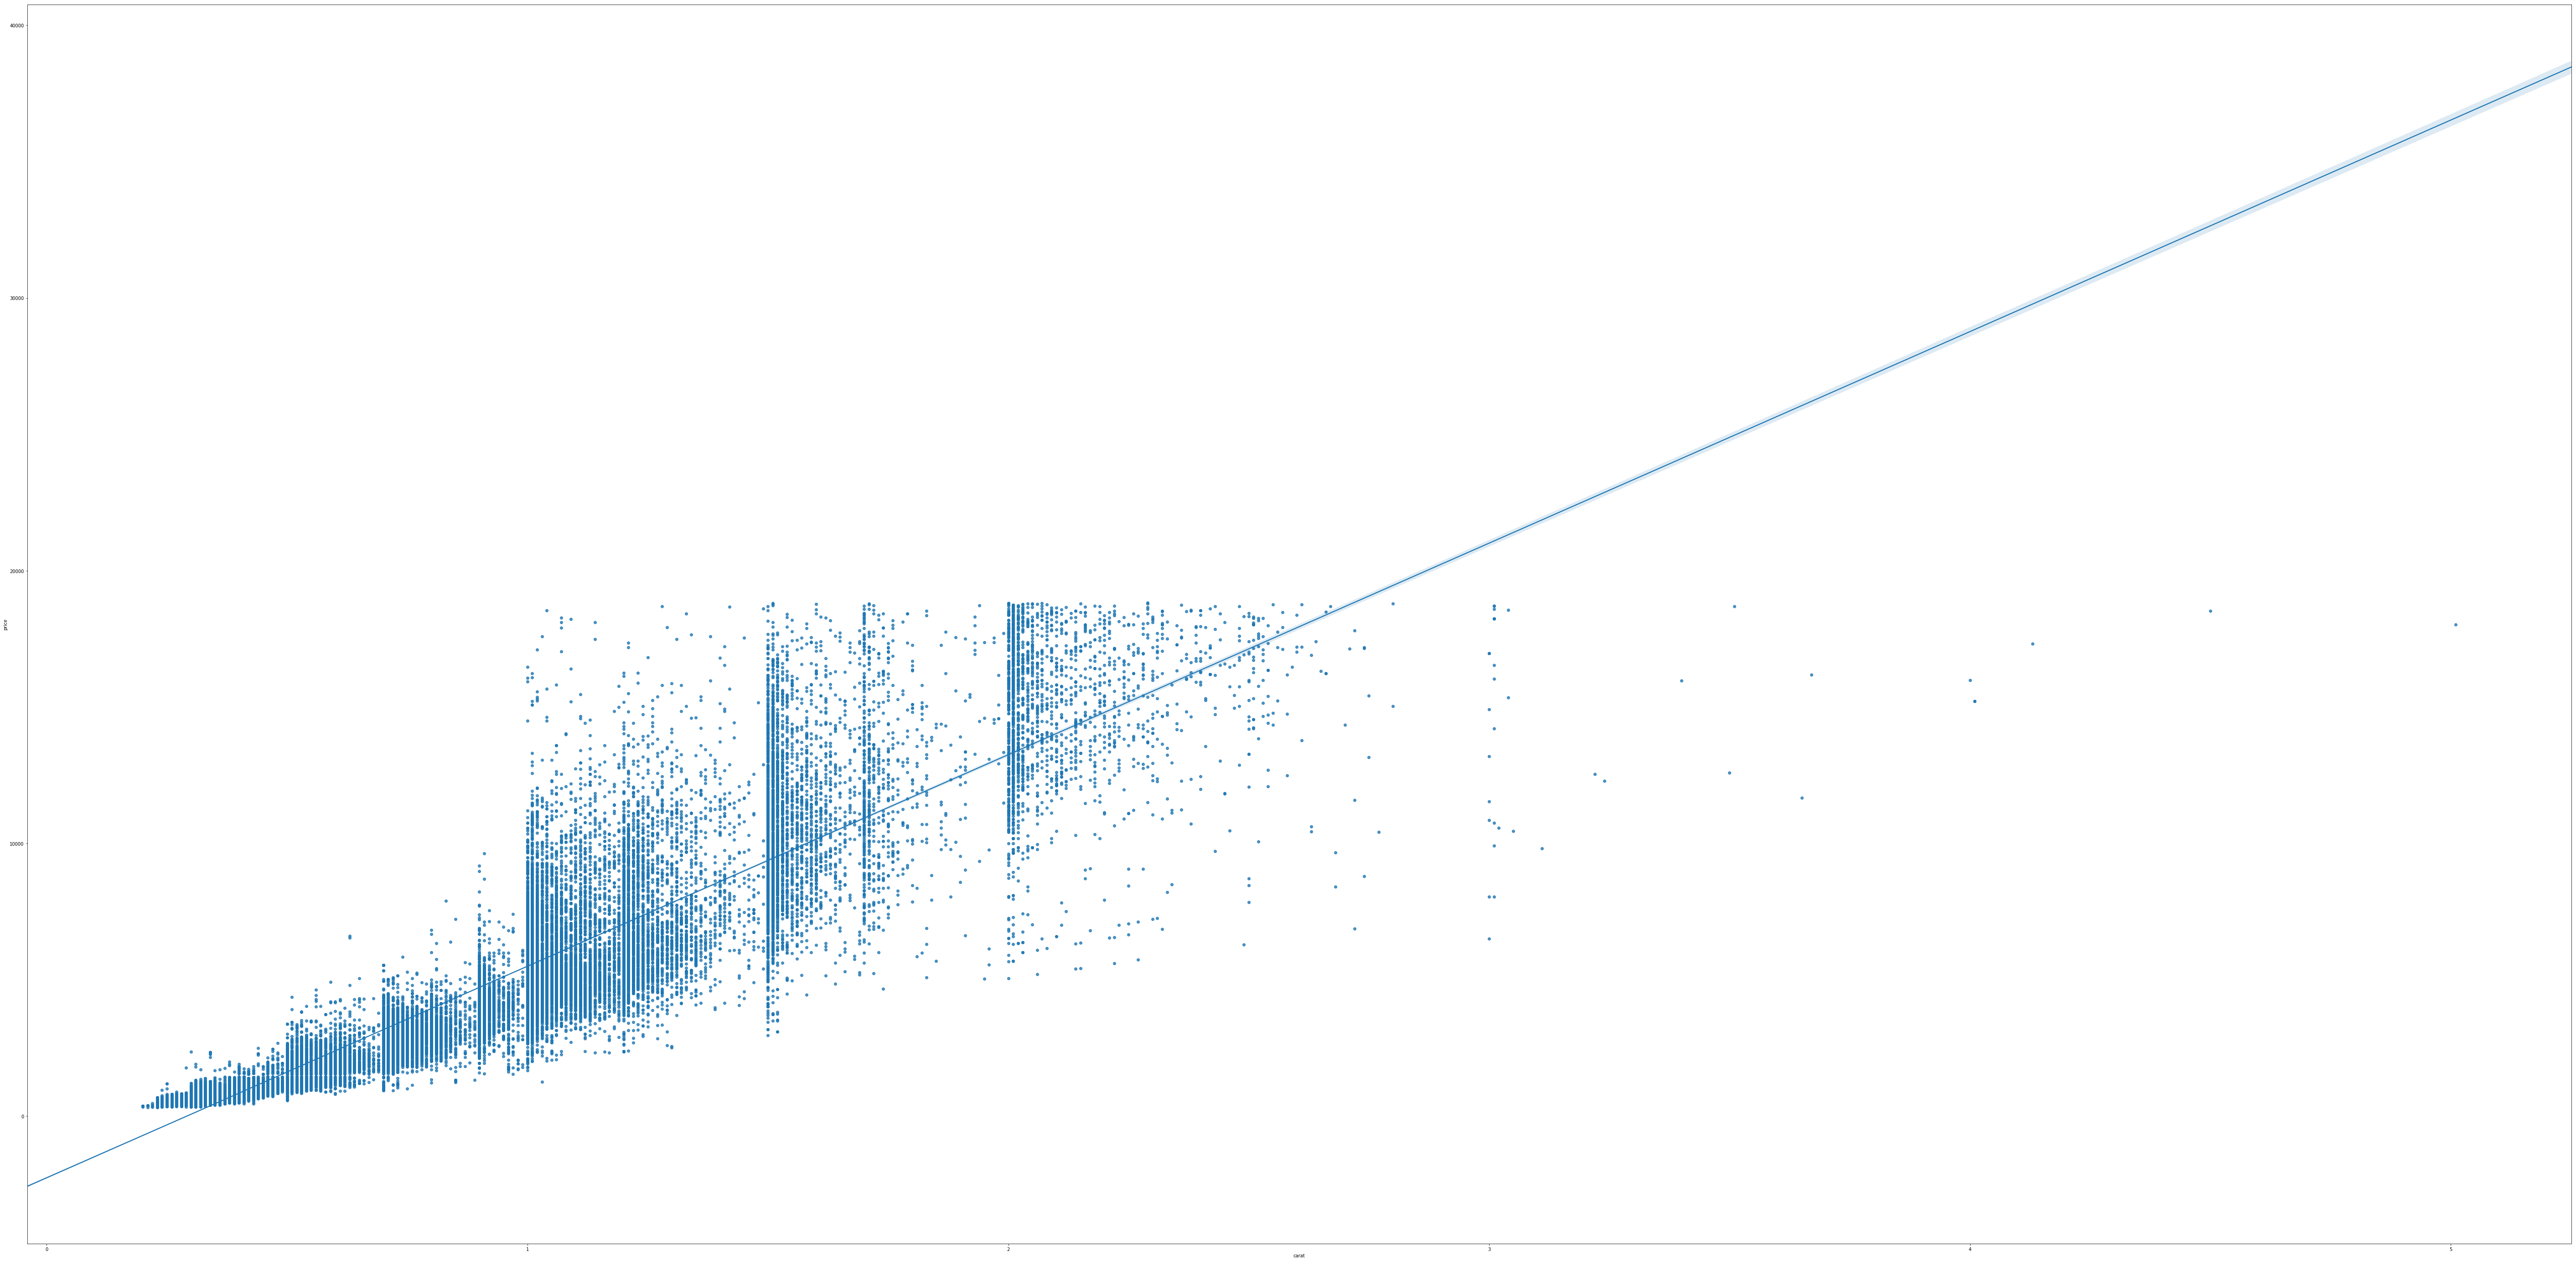

In [49]:
#Run this code
plt.figure(figsize=(100, 50))
sns.regplot(diam.carat, diam.price, scatter=True)


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


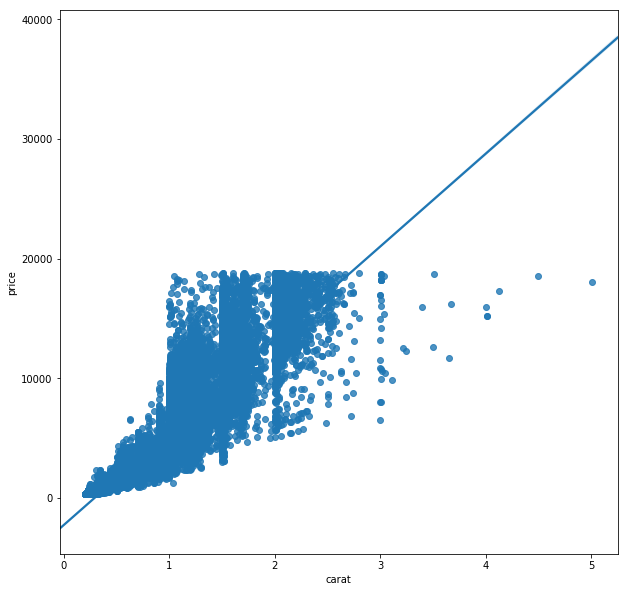

In [50]:
plt.figure(figsize=(10, 10))
sns.regplot(diam.carat, diam.price, scatter=True)


In [52]:
#Run this code
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diam.carat, diam.price)
r2 = r_value ** 2
r2

0.8493547015161191

In [51]:
X = diam.carat
Y = diam.price
slope, intercept, r_value, p_value, std_err  = stats.linregress(X, Y)
std_err

14.06532074815829

https://stackoverflow.com/questions/31455470/definition-of-standard-error-in-scipy-stats-linregress/41131017

**What do you think?**

Essentially, std_err should give a value for each coefficient represented in the gradient. In simple terms std_err tells you how good of a fit the gradient is (higher values mean less precise) for your data.thoughts here

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.